In [1]:
import intake
import xarray as xr
import numpy as np
import pandas as pd
from datetime import datetime
import proplot as plot 
import matplotlib.pyplot as plt

# 1. CMIP6 Data

In [2]:
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df

activity_id       institution_id      source_id       experiment_id  \
0       HighResMIP                 CMCC   CMCC-CM2-HR4  highresSST-present   
1       HighResMIP                 CMCC   CMCC-CM2-HR4  highresSST-present   
2       HighResMIP                 CMCC   CMCC-CM2-HR4  highresSST-present   
3       HighResMIP                 CMCC   CMCC-CM2-HR4  highresSST-present   
4       HighResMIP                 CMCC   CMCC-CM2-HR4  highresSST-present   
...            ...                  ...            ...                 ...   
523769        CMIP  EC-Earth-Consortium  EC-Earth3-Veg          historical   
523770        CMIP  EC-Earth-Consortium  EC-Earth3-Veg          historical   
523771        CMIP  EC-Earth-Consortium  EC-Earth3-Veg          historical   
523772        CMIP  EC-Earth-Consortium  EC-Earth3-Veg          historical   
523773        CMIP  EC-Earth-Consortium  EC-Earth3-Veg          historical   

       member_id table_id variable_id grid_label  \
0       r1i1p1f1     Amon          ps         gn   
1       r1i1p1f1     Amon        rsds         gn   
2       r1i1p1f1     Amon        rlus         gn   
3       r1i1p1f1     Amon        rlds         gn   
4       r1i1p1f1     Amon         psl         gn   
...          ...      ...         ...        ...   
523769  r1i1p1f1     Amon         tas         gr   
523770  r1i1p1f1     Amon        tauu         gr   
523771  r1i1p1f1     Amon         hur         gr   
523772  r1i1p1f1     Amon         hus         gr   
523773  r1i1p1f1     Amon        tauv         gr   

                                                   zstore  dcpp_init_year  \
0       gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...             NaN   
1       gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...             NaN   
2       gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...             NaN   
3       gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...             NaN   
4       gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...             NaN   
...                                                   ...             ...   
523769  gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...             NaN   
523770  gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...             NaN   
523771  gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...             NaN   
523772  gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...             NaN   
523773  gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...             NaN   

         version  
0       20170706  
1       20170706  
2       20170706  
3       20170706  
4       20170706  
...          ...  
523769  20211207  
523770  20211207  
523771  20211207  
523772  20211207  
523773  20211207  

[523774 rows x 11 columns]

In [3]:
url = "https://raw.githubusercontent.com/NCAR/intake-esm-datastore/master/catalogs/pangeo-cmip6.json"
dataframe = intake.open_esm_datastore(url)
dataframe.df.columns

Index(['activity_id', 'institution_id', 'source_id', 'experiment_id',
       'member_id', 'table_id', 'variable_id', 'grid_label', 'zstore',
       'dcpp_init_year', 'version'],
      dtype='object')

In [4]:
dataframe

# 2. Analysis of Historical Patterns - CMIP6_NOAA_historical (1948-2015)

## 2.1. Getting the Data

In [5]:
model_p = dataframe.search(table_id='3hr', 
                           variable_id='tas',
                           institution_id='NOAA-GFDL',
                           experiment_id='esm-hist', 
                           source_id='GFDL-ESM4')

In [6]:
datasets_p = model_p.to_dataset_dict()
print(datasets_p.keys())


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


dict_keys(['CMIP.NOAA-GFDL.GFDL-ESM4.esm-hist.3hr.gr1'])


In [7]:
ds_p = datasets_p['CMIP.NOAA-GFDL.GFDL-ESM4.esm-hist.3hr.gr1']   # NOAA_esm-hist
ds_p

<xarray.Dataset>
Dimensions:    (lat: 180, bnds: 2, lon: 288, member_id: 1, time: 481800)
Coordinates:
    height     float64 ...
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lon        (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 1850-01-01 03:00:00 ... 2015-01-01 00:00:00
  * member_id  (member_id) <U8 'r1i1p1f1'
Dimensions without coordinates: bnds
Data variables:
    tas        (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 415, 180, 288), meta=np.ndarray>
Attributes: (12/51)
    Conventions:             CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    0.0
    branch_time_in_parent:   36500.0
    comment:                 <null ref>
    ...                      ...
    variant_info:            N/A
    variant_label:           r1i1p1f1
    netcdf_tracking_ids:     hdl:21.14100/06e03473-5984-404a-b168-619a6fb074d...
    version_id:              v20180701
    intake_esm_varname:      ['tas']
    intake_esm_dataset_key:  CMIP.NOAA-GFDL.GFDL-ESM4.esm-hist.3hr.gr1

## 2.2. Data Pre-processing

In [9]:
# define a new dimension for year
a_p = range(1850, 2015) # 165 years
numYear_p = len(a_p)
b_p = range(len(ds_p.time)//numYear_p)

ind_p = pd.MultiIndex.from_product([a_p, b_p], names=['year', 'new_time'])
dset_p = ds_p.assign(time=ind_p).unstack('time')
dset_p = dset_p.rename({'new_time':'time'})
dset_p

<xarray.Dataset>
Dimensions:    (lat: 180, bnds: 2, lon: 288, member_id: 1, year: 165, time: 2920)
Coordinates:
    height     float64 ...
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lon        (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * member_id  (member_id) <U8 'r1i1p1f1'
  * year       (year) int64 1850 1851 1852 1853 1854 ... 2011 2012 2013 2014
  * time       (time) int64 0 1 2 3 4 5 6 ... 2913 2914 2915 2916 2917 2918 2919
Dimensions without coordinates: bnds
Data variables:
    tas        (member_id, lat, lon, year, time) float32 dask.array<chunksize=(1, 180, 288, 1, 2920), meta=np.ndarray>
Attributes: (12/51)
    Conventions:             CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    0.0
    branch_time_in_parent:   36500.0
    comment:                 <null ref>
    ...                      ...
    variant_info:            N/A
    variant_label:           r1i1p1f1
    netcdf_tracking_ids:     hdl:21.14100/06e03473-5984-404a-b168-619a6fb074d...
    version_id:              v20180701
    intake_esm_varname:      ['tas']
    intake_esm_dataset_key:  CMIP.NOAA-GFDL.GFDL-ESM4.esm-hist.3hr.gr1

In [10]:
tas_p = dset_p.tas.loc['r1i1p1f1', :, :, :, :].transpose('year','time','lat','lon')  # NOAA_esm-hist
tas_p

<xarray.DataArray 'tas' (year: 165, time: 2920, lat: 180, lon: 288)>
dask.array<transpose, shape=(165, 2920, 180, 288), dtype=float32, chunksize=(1, 2920, 180, 288), chunktype=numpy.ndarray>
Coordinates:
    height     float64 ...
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
    member_id  <U8 'r1i1p1f1'
  * year       (year) int64 1850 1851 1852 1853 1854 ... 2011 2012 2013 2014
  * time       (time) int64 0 1 2 3 4 5 6 ... 2913 2914 2915 2916 2917 2918 2919
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: mean time: point
    interp_method:  conserve_order2
    long_name:      Near-Surface Air Temperature
    original_name:  tas
    standard_name:  air_temperature
    units:          K

## 2.3. Obtaining Annual Air Temprature Quantiles Over the Years 1948-2015

In [11]:
quantiles_p = tas_p.quantile(q=0, dim='time')
for i in range(100):
    quantiles_p = xr.concat([quantiles_p, tas_p.quantile(q=(i+1)/100, dim='time')], "quantile")
    
quantiles_p

<xarray.DataArray 'tas' (quantile: 101, year: 165, lat: 180, lon: 288)>
dask.array<concatenate, shape=(101, 165, 180, 288), dtype=float64, chunksize=(1, 1, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat       (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon       (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
  * year      (year) int64 1850 1851 1852 1853 1854 ... 2010 2011 2012 2013 2014
  * quantile  (quantile) float64 0.0 0.01 0.02 0.03 0.04 ... 0.97 0.98 0.99 1.0

In [12]:
quantiles_1948 = quantiles_p[:, 98:, :, :]
quantiles_1948

<xarray.DataArray 'tas' (quantile: 101, year: 67, lat: 180, lon: 288)>
dask.array<getitem, shape=(101, 67, 180, 288), dtype=float64, chunksize=(1, 1, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat       (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon       (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
  * year      (year) int64 1948 1949 1950 1951 1952 ... 2010 2011 2012 2013 2014
  * quantile  (quantile) float64 0.0 0.01 0.02 0.03 0.04 ... 0.97 0.98 0.99 1.0

## 2.4. Calculating the Annual Warming Rate of Air Temperature Quantiles

In [13]:
numYear_1948 = len(quantiles_1948.year)
x_mean_p = quantiles_1948.year.mean()
y_mean_p = quantiles_1948.mean(dim='year')
S_xx_p = (quantiles_1948.year * quantiles_1948.year).sum() - numYear_1948 * x_mean_p * x_mean_p
S_xx_p

<xarray.DataArray 'year' ()>
array(25058.)

In [14]:
S_xy_p = quantiles_1948.dot(quantiles_1948.year) - numYear_1948 * x_mean_p * y_mean_p
S_xy_p

<xarray.DataArray (quantile: 101, lat: 180, lon: 288)>
dask.array<sub, shape=(101, 180, 288), dtype=float64, chunksize=(1, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat       (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon       (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
  * quantile  (quantile) float64 0.0 0.01 0.02 0.03 0.04 ... 0.97 0.98 0.99 1.0

In [15]:
slopes_p = S_xy_p/S_xx_p
slopes_p

<xarray.DataArray (quantile: 101, lat: 180, lon: 288)>
dask.array<truediv, shape=(101, 180, 288), dtype=float64, chunksize=(1, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat       (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon       (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
  * quantile  (quantile) float64 0.0 0.01 0.02 0.03 0.04 ... 0.97 0.98 0.99 1.0

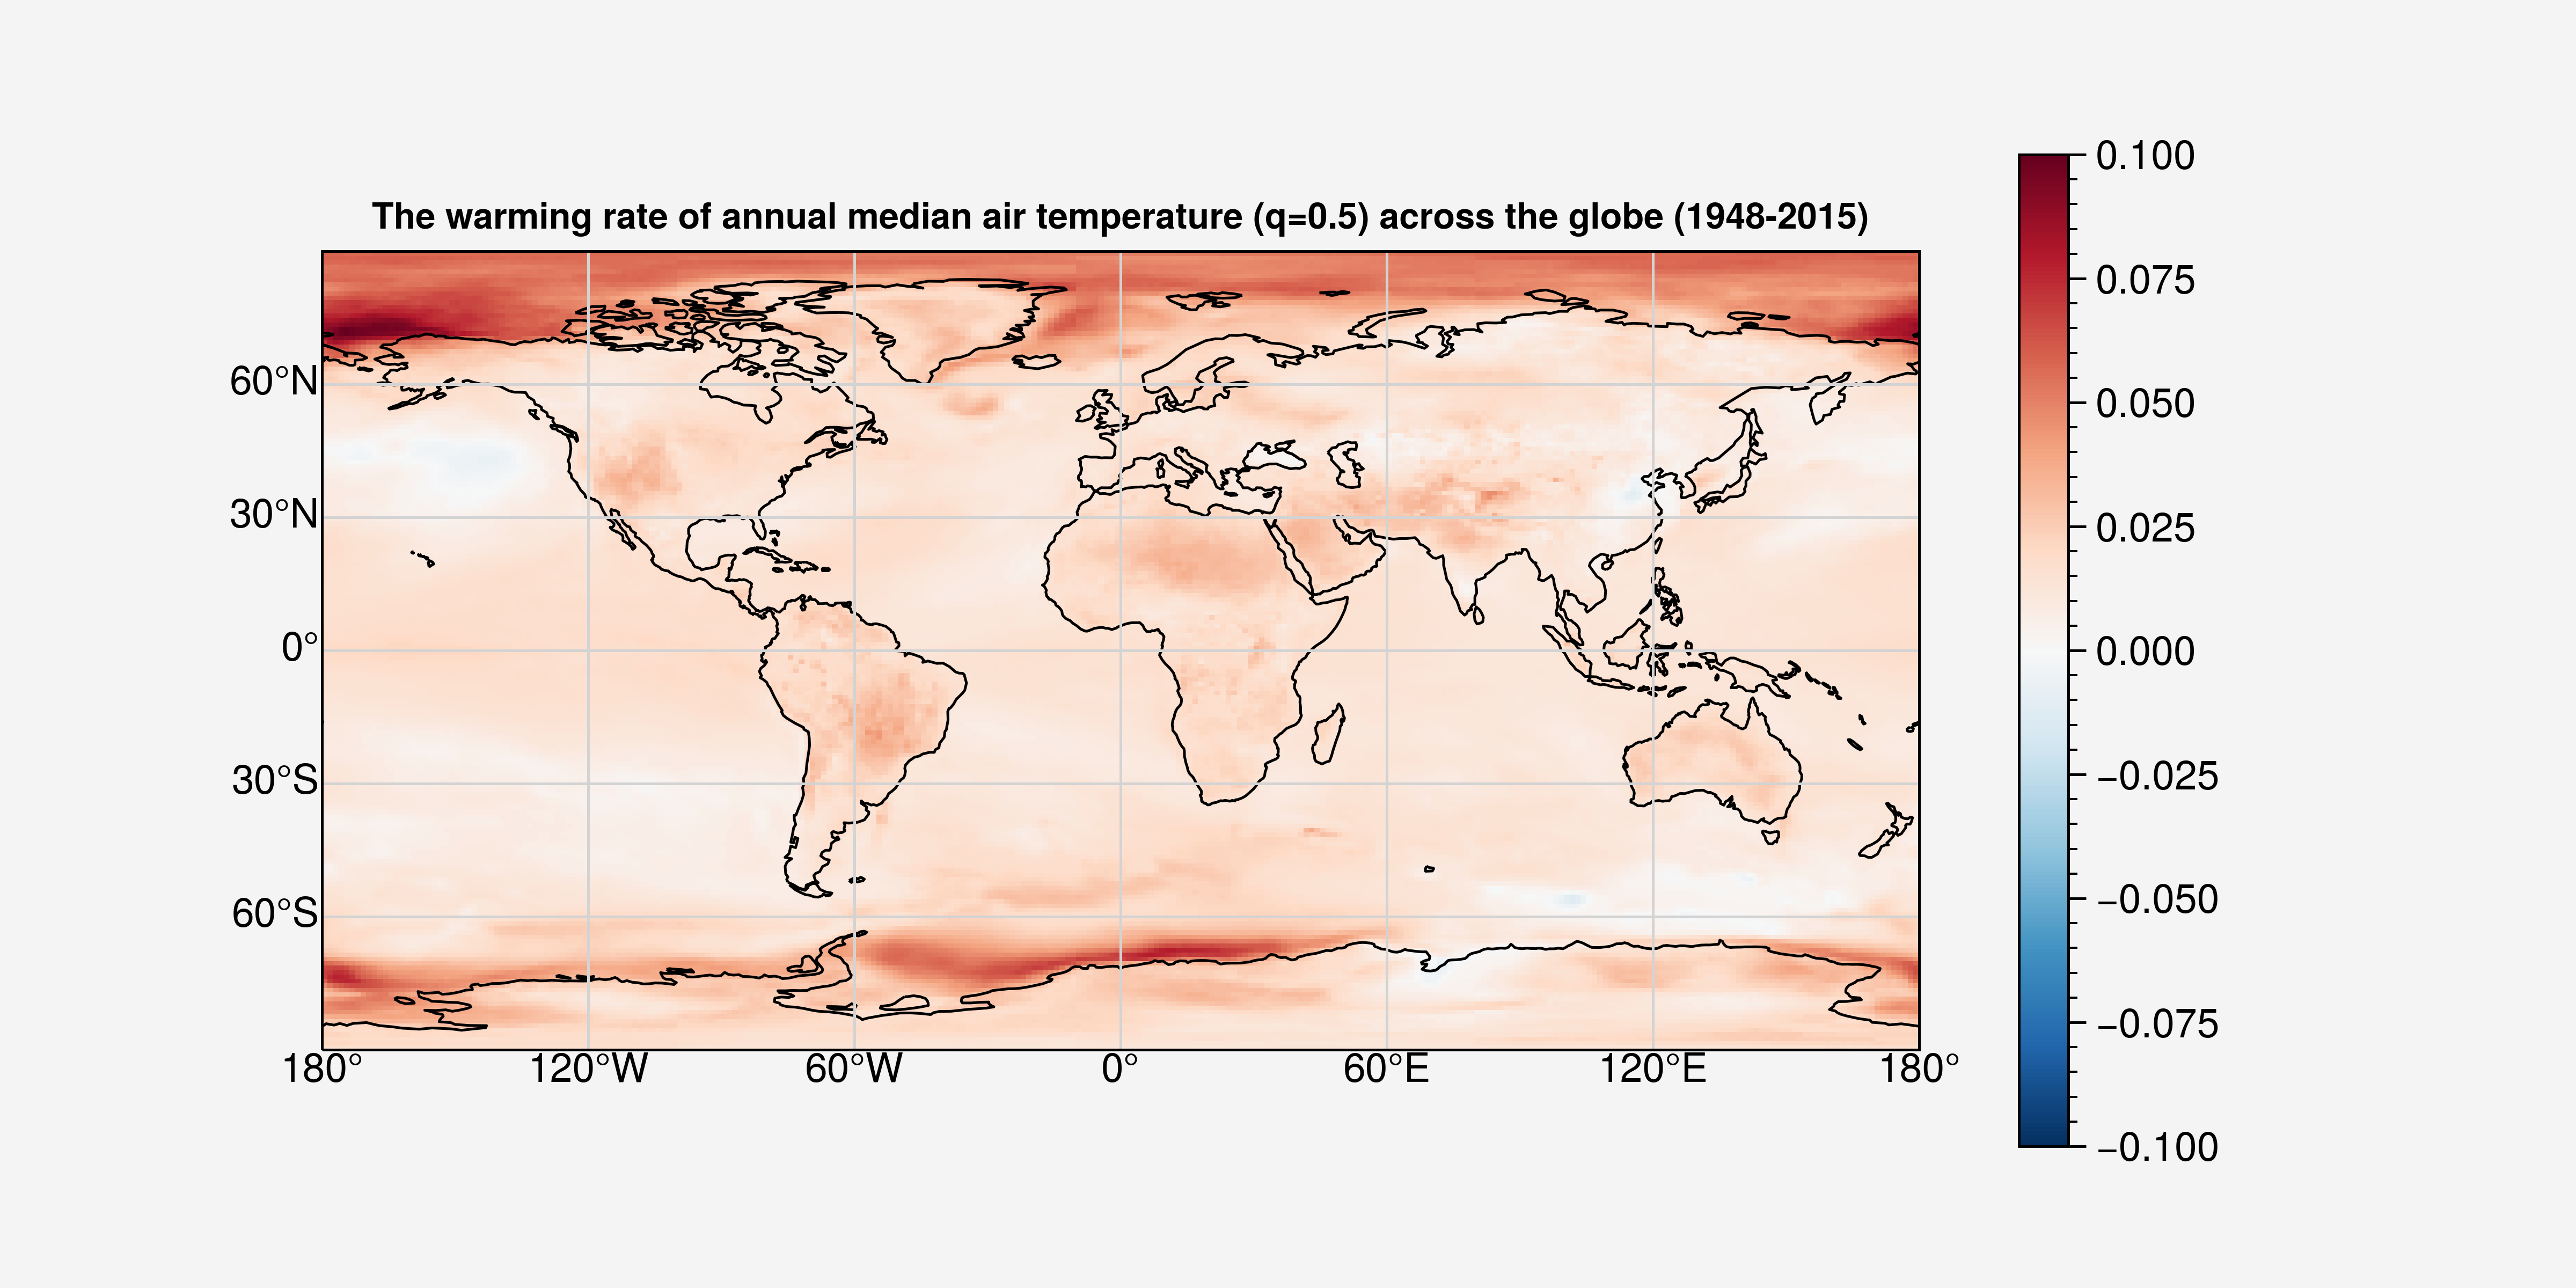

In [16]:
# heatmap - the warming rate of annual median air temperature (q=0.5) across the globe
import cartopy.crs as ccrs
import matplotlib.colors as colors

fig = plt.figure(figsize=(8,4), dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())
slopes_p[50, :, :].plot(ax=ax, transform=ccrs.PlateCarree(), norm=colors.Normalize(vmin=-0.1, vmax=0.1))
ax.coastlines()
plt.title('The warming rate of annual median air temperature (q=0.5) across the globe (1948-2015)', 
          fontsize=8, fontweight='bold')

# Add gridlines with labels
gl = ax.gridlines(color='lightgrey', linestyle='-', draw_labels=True)
gl.top_labels = False
gl.right_labels = False

In [17]:
stacked_p = slopes_p.stack(coord = ('lat', 'lon'))
coordinates_p = stacked_p.coord.to_numpy().T

In [18]:
coord_p = np.zeros((len(coordinates_p), 2))
for i in range(len(coordinates_p)):
    coord_p[i, 0] = coordinates_p[i][0]
    coord_p[i, 1] = coordinates_p[i][1]
    if coord_p[i, 1] > 180:
        coord_p[i, 1] -= 360

In [20]:
all_slopes_p = stacked_p.to_numpy().T
all_slopes_p.shape

Text(0.5, 0, 'quantile')

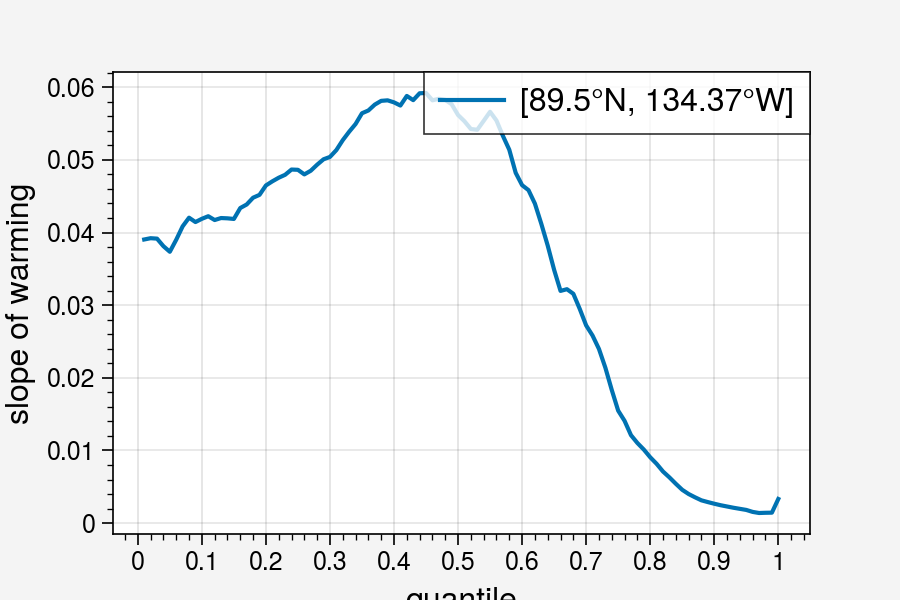

In [21]:
# plot - the warming rate of annual air temperature quantiles near the North Pole
fig, ax = plt.subplots(figsize=(4.5, 3))
xaxis = np.arange(0.01, 1.01, .01)
ax.plot(xaxis, all_slopes_p[51732, 1:])
ax.set_ylabel('slope of warming', fontsize=11.5)
ax.set_xticks(np.arange(0, 1.01, .1))
ax.grid(which='major', axis='x', linewidth=.7)
ax.legend(['[89.5°N, 134.37°W]'], fontsize=11.5, loc='upper right')
ax.set_xlabel('quantile', fontsize=11.5)
# ax.set_title('The warming rate of annual air temperature quantiles near the North Pole', fontsize=12) 

Text(0.5, 0, 'quantile')

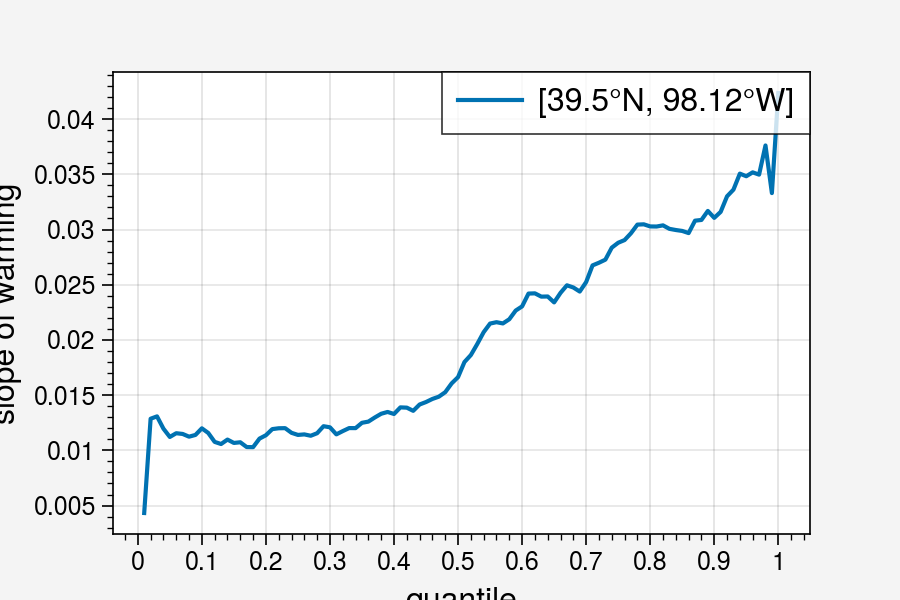

In [22]:
# plot - the warming rate of annual air temperature quantiles in the center of the U.S.
fig, ax = plt.subplots(figsize=(4.5, 3))
xaxis = np.arange(0.01, 1.01, .01)
ax.plot(xaxis, all_slopes_p[37361, 1:])
ax.set_ylabel('slope of warming', fontsize=11.5)
ax.set_xticks(np.arange(0, 1.01, .1))
ax.grid(which='major', axis='x', linewidth=.7)
ax.legend(['[39.5°N, 98.12°W]'], fontsize=11.5, loc='upper right')
ax.set_xlabel('quantile', fontsize=11.5)
# ax.set_title('The warming rate of annual air temperature quantiles in the center of the U.S.', fontsize=12)

In [23]:
df_p = pd.DataFrame(coord_p, columns=['latitude', 'longitude'])
df_p = df_p.reset_index()
df_p

index  latitude  longitude
0          0     -89.5      0.625
1          1     -89.5      1.875
2          2     -89.5      3.125
3          3     -89.5      4.375
4          4     -89.5      5.625
...      ...       ...        ...
51835  51835      89.5     -5.625
51836  51836      89.5     -4.375
51837  51837      89.5     -3.125
51838  51838      89.5     -1.875
51839  51839      89.5     -0.625

[51840 rows x 3 columns]

## 2.5. K-Means Clustering

### 2.5.1. Identifying the Optimal Number of Clusters using the Elbow Method

In [24]:
from sklearn.cluster import KMeans

wcss_p = []
for num_of_clusters in range(2, 50):
    kmeans = KMeans(n_clusters=num_of_clusters, init='random', n_init=10, max_iter=1000, tol=1e-05, random_state=0)
    kmeans.fit(all_slopes_p)
    labels = kmeans.fit_predict(all_slopes_p)
    wcss_p.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Gragh (1948-2015)')

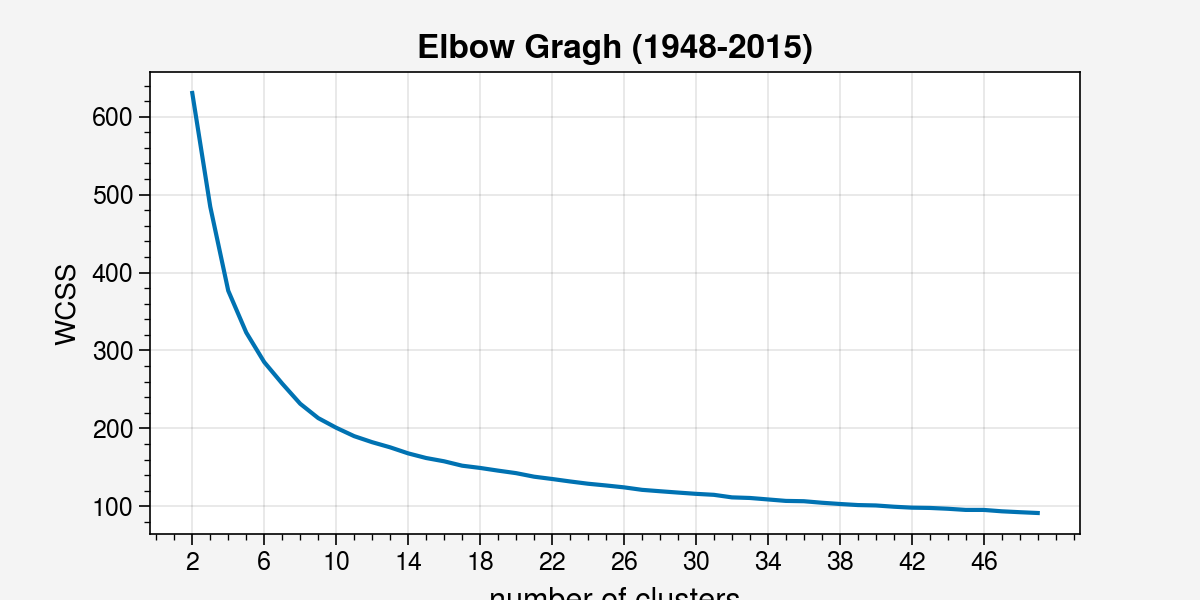

In [25]:
# plot WCSS against the number of clusters
fig, ax = plt.subplots(figsize=(6, 3))
xaxis = np.arange(2, 50, 1)
ax.plot(xaxis, wcss_p)
ax.set_ylabel('WCSS', fontsize=10)
ax.set_xticks(np.arange(2, 50, 4))
ax.set_xlabel('number of clusters', fontsize=11)
plt.title('Elbow Gragh (1948-2015)', fontsize=12, fontweight='bold')

### 2.5.2. Performing Classification

In [26]:
from sklearn.cluster import KMeans
n_clusters_p = 6
kmeans_6c_p = KMeans(n_clusters=n_clusters_p, init='random', n_init=10, max_iter=1000, tol=1e-05, random_state=4)
labels_6c_p = kmeans_6c_p.fit_predict(all_slopes_p)

In [27]:
df_p['labels_6c'] = labels_6c_p
df_p['text_6c'] = 'Cluster ' + (df_p['labels_6c']+1).astype(str)
df_p

index  latitude  longitude  labels_6c    text_6c
0          0     -89.5      0.625          5  Cluster 6
1          1     -89.5      1.875          5  Cluster 6
2          2     -89.5      3.125          5  Cluster 6
3          3     -89.5      4.375          5  Cluster 6
4          4     -89.5      5.625          5  Cluster 6
...      ...       ...        ...        ...        ...
51835  51835      89.5     -5.625          3  Cluster 4
51836  51836      89.5     -4.375          3  Cluster 4
51837  51837      89.5     -3.125          3  Cluster 4
51838  51838      89.5     -1.875          3  Cluster 4
51839  51839      89.5     -0.625          3  Cluster 4

[51840 rows x 5 columns]

In [28]:
df1_p = df_p.loc[df_p['labels_6c']==0]
df2_p = df_p.loc[df_p['labels_6c']==1]
df3_p = df_p.loc[df_p['labels_6c']==2]
df4_p = df_p.loc[df_p['labels_6c']==3]
df5_p = df_p.loc[df_p['labels_6c']==4]
df6_p = df_p.loc[df_p['labels_6c']==5]

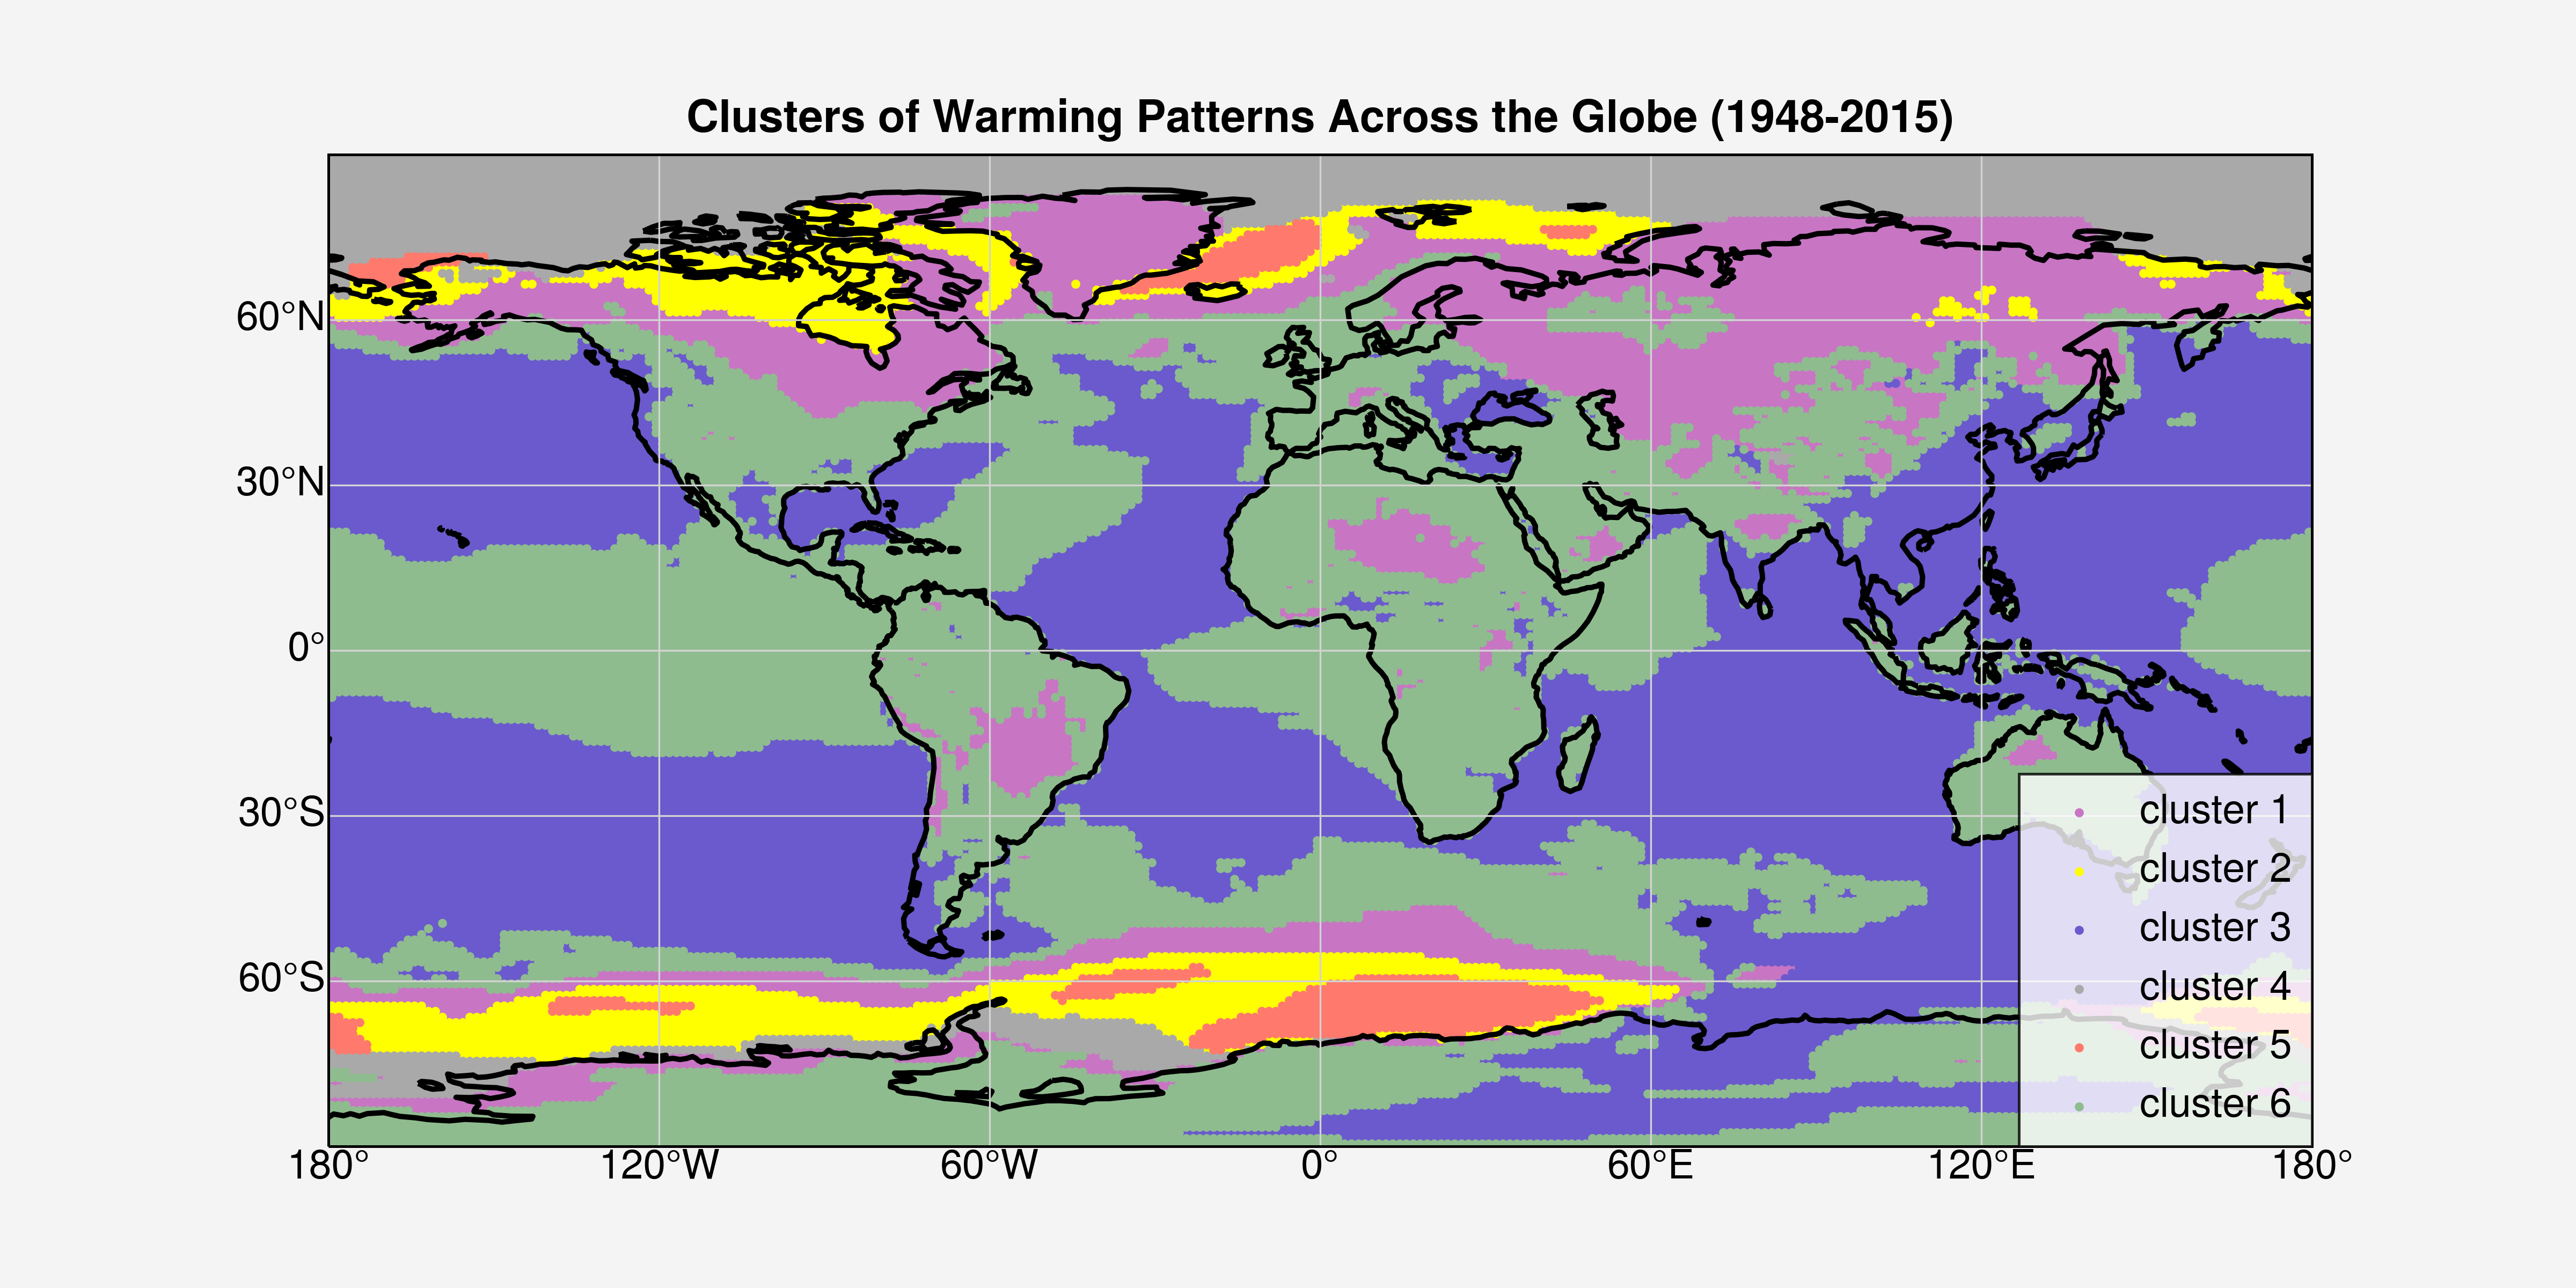

In [31]:
import cartopy.crs as ccrs
import matplotlib.colors as colors
import cartopy.feature as cfeature

fig = plt.figure(figsize=(8,4), dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())

ax.scatter(df1_p['longitude'],df1_p['latitude'],marker='o', s=2, c='orchid', label='cluster 1')
ax.scatter(df2_p['longitude'],df2_p['latitude'],marker='o',s=2,c='yellow', label='cluster 2')
ax.scatter(df3_p['longitude'],df3_p['latitude'],marker='o',s=2,c='slateblue', label='cluster 3')
ax.scatter(df4_p['longitude'],df4_p['latitude'],marker='o',s=2,c='darkgrey', label='cluster 4')
ax.scatter(df5_p['longitude'],df5_p['latitude'],marker='o',s=2,c='salmon', label='cluster 5')
ax.scatter(df6_p['longitude'],df6_p['latitude'],marker='o',s=2,c='darkseagreen', label='cluster 6')
ax.coastlines(linewidth=1.2)
ax.legend(loc='lower right')
plt.title('Clusters of Warming Patterns Across the Globe (1948-2015)', fontsize=10, fontweight='bold')

# Add gridlines with labels
gl = ax.gridlines(color='lightgrey', linestyle='-', draw_labels=True, linewidth=0.4)
gl.top_labels = False
gl.right_labels = False

### 2.5.3. Obtaining the Area of Each Cluster

In [33]:
# obtain the area of each cluster 
import math
L_p = slopes_p.lon[1] - slopes_p.lon[0]
w_p = (slopes_p.lat[1] - slopes_p.lat[0])/2
area_p = [0] * n_clusters_p
for clus_no in range(n_clusters_p):
    df_clus_p = df_p.loc[df_p['labels_6c']==clus_no]
    for k in range(len(df_clus_p)):
        area_p[clus_no] += (L_p/360) * (math.sin(math.radians(df_clus_p.latitude.values[k] + w_p)) 
                                    - math.sin(math.radians(df_clus_p.latitude.values[k] - w_p)))

In [34]:
area_p

[<xarray.DataArray 'lon' ()>
 array(0.21959105),
 <xarray.DataArray 'lon' ()>
 array(0.06713277),
 <xarray.DataArray 'lon' ()>
 array(0.88067157),
 <xarray.DataArray 'lon' ()>
 array(0.03996349),
 <xarray.DataArray 'lon' ()>
 array(0.02067423),
 <xarray.DataArray 'lon' ()>
 array(0.77196688)]

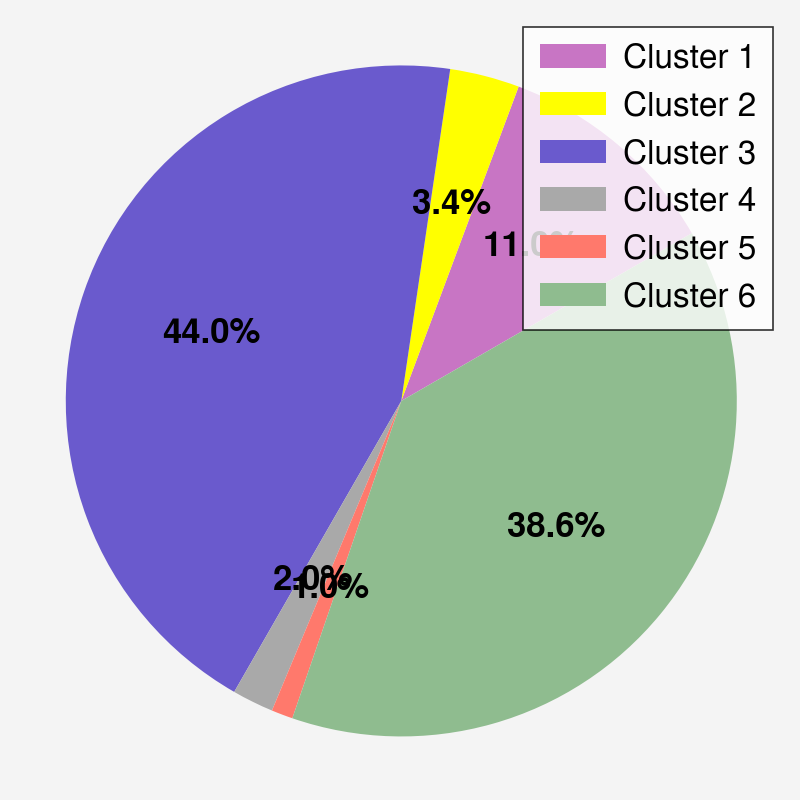

In [36]:
# pie chart showing area of each cluster
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6']
sizes = [area_p[0], area_p[1], area_p[2], area_p[3], area_p[4], area_p[5]]
colors = ['orchid', 'yellow', 'slateblue', 'darkgrey', 'salmon', 'darkseagreen']

plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=30, textprops={'color':'black', 'weight':'bold', 'fontsize':12.5})
plt.legend(labels, loc='upper right', fontsize=12)
plt.axis('equal')
plt.tight_layout()
# plt.title('Area of Clusters (1948-2015)', fontsize=16, fontweight='bold')

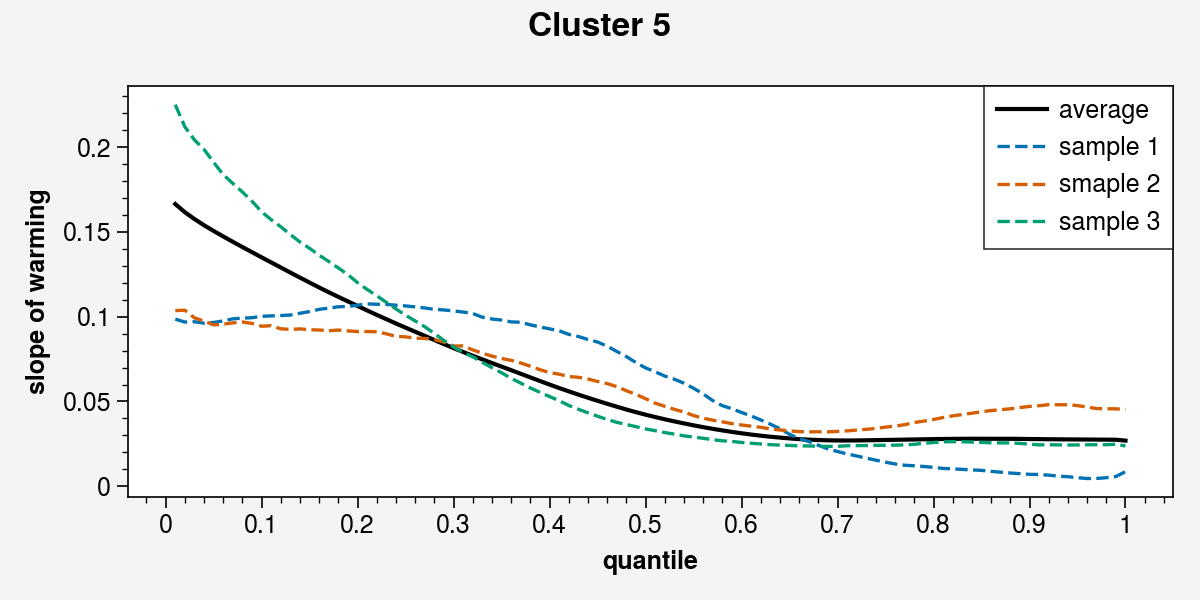

In [41]:
fig, ax = plt.subplots(1, figsize=(6, 3), sharex=True, sharey=True)
xaxis = np.arange(0.01, 1.01, .01)

ax.plot(xaxis, np.mean(all_slopes_p[df5_p.index, :], axis=0)[1:], color='black')
ax.set_ylabel('slope of warming', fontsize=9, fontweight='bold')
ax.set_xticks(np.arange(0, 1.01, .1))
ax.set_xlabel('quantile', fontsize=9, fontweight='bold')

ax.plot(xaxis, all_slopes_p[5041, 1:], linestyle='--', linewidth=1.2)
ax.plot(xaxis, all_slopes_p[48380, 1:], linestyle='--', linewidth=1.2)
ax.plot(xaxis, all_slopes_p[7497, 1:], linestyle='--', linewidth=1.2)

ax.legend(['average', 'sample 1', 'smaple 2', 'sample 3'], fontsize=9, loc='upper right')

fig.suptitle('Cluster 5', fontsize=12, fontweight='bold') 
plt.tight_layout()
plt.grid(False)

# 3. Analysis of Future Patterns - CMIP6_NOAA_future (2015-2101)

## 3.1. Getting the Data

In [42]:
model_f = dataframe.search(table_id='3hr', 
                           variable_id='tas',
                           institution_id='NOAA-GFDL',
                           experiment_id='ssp126', 
                           source_id='GFDL-ESM4')

In [43]:
datasets_f = model_f.to_dataset_dict()
print(datasets_f.keys())


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


dict_keys(['ScenarioMIP.NOAA-GFDL.GFDL-ESM4.ssp126.3hr.gr1'])


In [44]:
ds_f = datasets_f['ScenarioMIP.NOAA-GFDL.GFDL-ESM4.ssp126.3hr.gr1']   # NOAA_future
ds_f

<xarray.Dataset>
Dimensions:    (lat: 180, bnds: 2, lon: 288, member_id: 1, time: 251120)
Coordinates:
    height     float64 ...
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lon        (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 2015-01-01 03:00:00 ... 2101-01-01 00:00:00
  * member_id  (member_id) <U8 'r1i1p1f1'
Dimensions without coordinates: bnds
Data variables:
    tas        (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 417, 180, 288), meta=np.ndarray>
Attributes: (12/51)
    Conventions:             CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:             ScenarioMIP
    branch_method:           standard
    branch_time_in_child:    60225.0
    branch_time_in_parent:   60225.0
    comment:                 <null ref>
    ...                      ...
    variant_info:            N/A
    variant_label:           r1i1p1f1
    netcdf_tracking_ids:     hdl:21.14100/6acae1da-f3ad-40f7-a1ec-381620e2f0a...
    version_id:              v20180701
    intake_esm_varname:      ['tas']
    intake_esm_dataset_key:  ScenarioMIP.NOAA-GFDL.GFDL-ESM4.ssp126.3hr.gr1

## 3.2. Data Pre-processing

In [45]:
a_f = range(2015, 2101) # 86 years
numYear_f = len(a_f)
b_f = range(len(ds_f.time)//numYear_f)

In [46]:
ind_f = pd.MultiIndex.from_product([a_f, b_f], names=['year', 'new_time'])
dset_f = ds_f.assign(time=ind_f).unstack('time')
dset_f = dset_f.rename({'new_time':'time'})
dset_f

<xarray.Dataset>
Dimensions:    (lat: 180, bnds: 2, lon: 288, member_id: 1, year: 86, time: 2920)
Coordinates:
    height     float64 ...
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lon        (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * member_id  (member_id) <U8 'r1i1p1f1'
  * year       (year) int64 2015 2016 2017 2018 2019 ... 2097 2098 2099 2100
  * time       (time) int64 0 1 2 3 4 5 6 ... 2913 2914 2915 2916 2917 2918 2919
Dimensions without coordinates: bnds
Data variables:
    tas        (member_id, lat, lon, year, time) float32 dask.array<chunksize=(1, 180, 288, 1, 2920), meta=np.ndarray>
Attributes: (12/51)
    Conventions:             CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:             ScenarioMIP
    branch_method:           standard
    branch_time_in_child:    60225.0
    branch_time_in_parent:   60225.0
    comment:                 <null ref>
    ...                      ...
    variant_info:            N/A
    variant_label:           r1i1p1f1
    netcdf_tracking_ids:     hdl:21.14100/6acae1da-f3ad-40f7-a1ec-381620e2f0a...
    version_id:              v20180701
    intake_esm_varname:      ['tas']
    intake_esm_dataset_key:  ScenarioMIP.NOAA-GFDL.GFDL-ESM4.ssp126.3hr.gr1

In [47]:
tas_f = dset_f.tas.loc['r1i1p1f1', :, :, :, :].transpose('year','time','lat','lon')  # NOAA_future
tas_f

<xarray.DataArray 'tas' (year: 86, time: 2920, lat: 180, lon: 288)>
dask.array<transpose, shape=(86, 2920, 180, 288), dtype=float32, chunksize=(1, 2920, 180, 288), chunktype=numpy.ndarray>
Coordinates:
    height     float64 ...
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
    member_id  <U8 'r1i1p1f1'
  * year       (year) int64 2015 2016 2017 2018 2019 ... 2097 2098 2099 2100
  * time       (time) int64 0 1 2 3 4 5 6 ... 2913 2914 2915 2916 2917 2918 2919
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: mean time: point
    interp_method:  conserve_order2
    long_name:      Near-Surface Air Temperature
    original_name:  tas
    standard_name:  air_temperature
    units:          K

## 3.3. Obtaining Annual Air Temprature Quantiles Over the Years 1948-2015

In [48]:
quantiles_f = tas_f.quantile(q=0, dim='time')
for i in range(100):
    quantiles_f = xr.concat([quantiles_f, tas_f.quantile(q=(i+1)/100, dim='time')], "quantile")
    
quantiles_f

<xarray.DataArray 'tas' (quantile: 101, year: 86, lat: 180, lon: 288)>
dask.array<concatenate, shape=(101, 86, 180, 288), dtype=float64, chunksize=(1, 1, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat       (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon       (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
  * year      (year) int64 2015 2016 2017 2018 2019 ... 2096 2097 2098 2099 2100
  * quantile  (quantile) float64 0.0 0.01 0.02 0.03 0.04 ... 0.97 0.98 0.99 1.0

## 3.4. Calculating the Annual Warming Rate of Air Temperature Quantiles

In [49]:
x_mean_f = quantiles_f.year.mean()
y_mean_f = quantiles_f.mean(dim='year')
S_xx_f = (quantiles_f.year * quantiles_f.year).sum() - numYear_f * x_mean_f * x_mean_f
S_xx_f

<xarray.DataArray 'year' ()>
array(52997.5)

In [50]:
S_xy_f = quantiles_f.dot(quantiles_f.year) - numYear_f * x_mean_f * y_mean_f
S_xy_f

<xarray.DataArray (quantile: 101, lat: 180, lon: 288)>
dask.array<sub, shape=(101, 180, 288), dtype=float64, chunksize=(1, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat       (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon       (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
  * quantile  (quantile) float64 0.0 0.01 0.02 0.03 0.04 ... 0.97 0.98 0.99 1.0

In [51]:
slopes_f = S_xy_f/S_xx_f
slopes_f

<xarray.DataArray (quantile: 101, lat: 180, lon: 288)>
dask.array<truediv, shape=(101, 180, 288), dtype=float64, chunksize=(1, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat       (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon       (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
  * quantile  (quantile) float64 0.0 0.01 0.02 0.03 0.04 ... 0.97 0.98 0.99 1.0

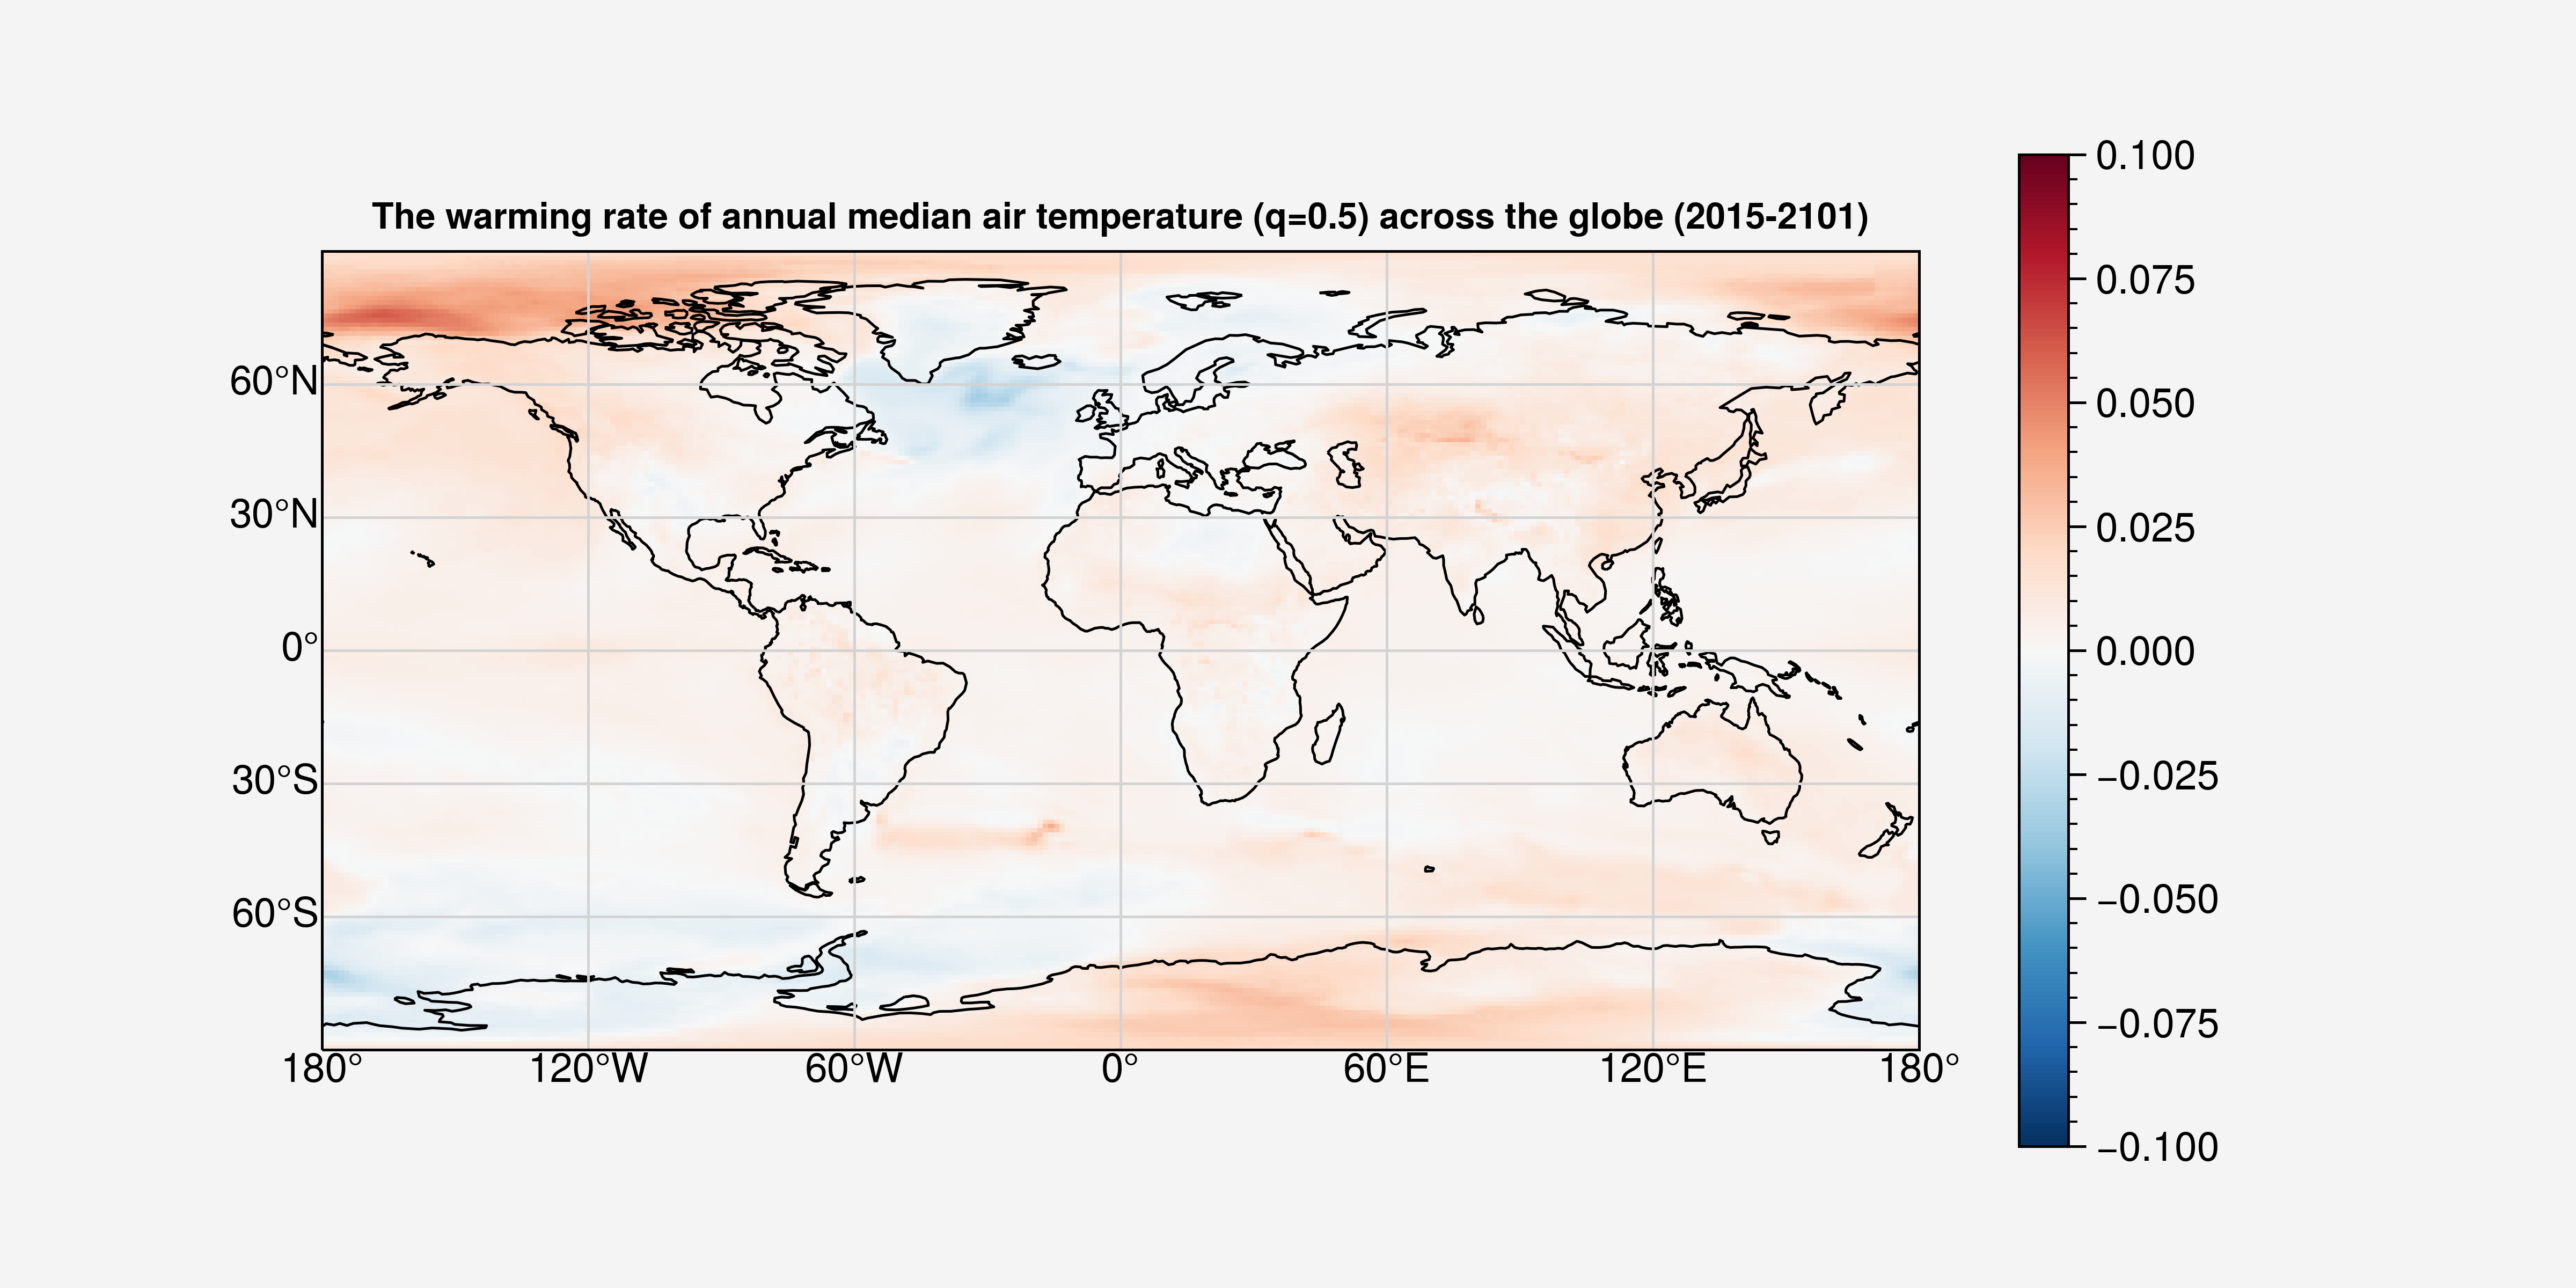

In [52]:
# heatmap - the warming rate of annual median air temperature (q=0.5) across the globe
import cartopy.crs as ccrs
import matplotlib.colors as colors

fig = plt.figure(figsize=(8,4), dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())
slopes_f[50, :, :].plot(ax=ax, transform=ccrs.PlateCarree(), norm=colors.Normalize(vmin=-0.1, vmax=0.1))
ax.coastlines()
plt.title('The warming rate of annual median air temperature (q=0.5) across the globe (2015-2101)', 
          fontsize=8, fontweight='bold')

# Add gridlines with labels
gl = ax.gridlines(color='lightgrey', linestyle='-', draw_labels=True)
gl.top_labels = False
gl.right_labels = False

In [53]:
stacked_f = slopes_f.stack(coord = ('lat', 'lon'))
coordinates_f = stacked_f.coord.to_numpy().T

In [54]:
coord_f = np.zeros((len(coordinates_f), 2))
for i in range(len(coordinates_f)):
    coord_f[i, 0] = coordinates_f[i][0]
    coord_f[i, 1] = coordinates_f[i][1]
    if coord_f[i, 1] > 180:
        coord_f[i, 1] -= 360

In [55]:
all_slopes_f = pd.read_csv("slopes_NOAA_future.csv").to_numpy()

In [56]:
# all_slopes_f = stacked_f.to_numpy().T
# all_slopes_f.shape

In [57]:
df_f = pd.DataFrame(coord_f, columns=['latitude', 'longitude'])
df_f = df_f.reset_index()
df_f

index  latitude  longitude
0          0     -89.5      0.625
1          1     -89.5      1.875
2          2     -89.5      3.125
3          3     -89.5      4.375
4          4     -89.5      5.625
...      ...       ...        ...
51835  51835      89.5     -5.625
51836  51836      89.5     -4.375
51837  51837      89.5     -3.125
51838  51838      89.5     -1.875
51839  51839      89.5     -0.625

[51840 rows x 3 columns]

## 3.5. K-Means Clustering

### 3.5.1. Identifying the Optimal Number of Clusters using the Elbow Method

In [58]:
from sklearn.cluster import KMeans

wcss_f = []
for num_of_clusters in range(2, 50):
    kmeans = KMeans(n_clusters=num_of_clusters, init='random', n_init=10, max_iter=1000, tol=1e-05, random_state=0)
    kmeans.fit(all_slopes_f)
    labels = kmeans.fit_predict(all_slopes_f)
    wcss_f.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Gragh (2015-2101)')

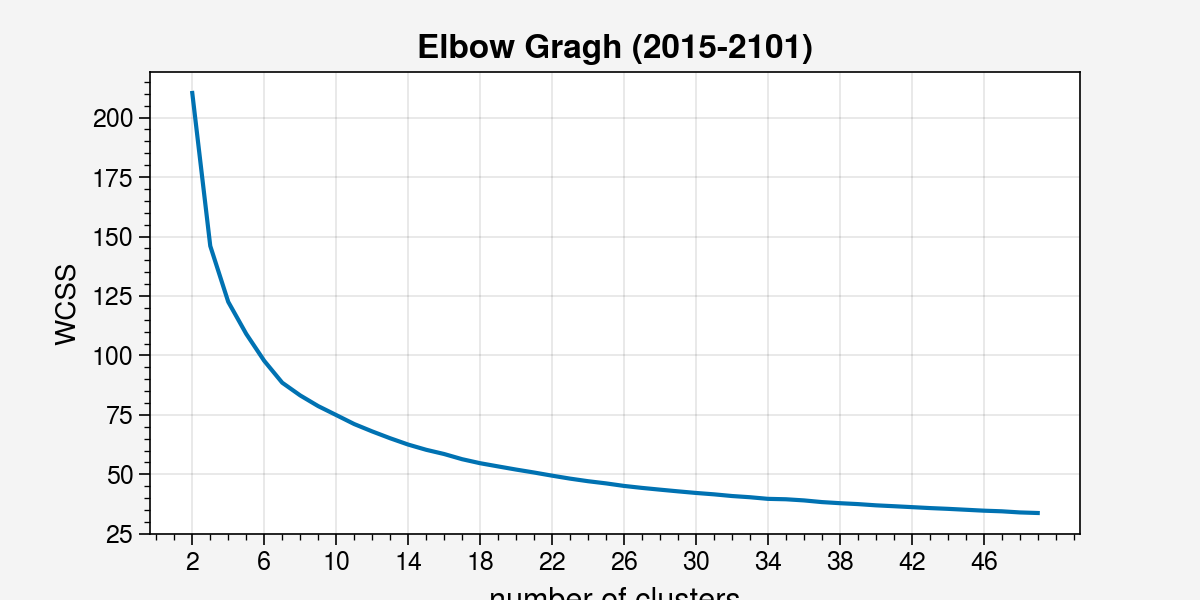

In [59]:
# plot WCSS against the number of clusters
fig, ax = plt.subplots(figsize=(6, 3))
xaxis = np.arange(2, 50, 1)
ax.plot(xaxis, wcss_f)
ax.set_ylabel('WCSS', fontsize=10)
ax.set_xticks(np.arange(2, 50, 4))
ax.set_xlabel('number of clusters', fontsize=11)
plt.title('Elbow Gragh (2015-2101)', fontsize=12, fontweight='bold')

### 3.5.2. Performing Classification

In [60]:
from sklearn.cluster import KMeans
n_clusters_f = 6
kmeans_6c_f = KMeans(n_clusters=n_clusters_f, init='random', n_init=10, max_iter=1000, tol=1e-05, random_state=4)
labels_6c_f = kmeans_6c_f.fit_predict(all_slopes_f)

In [61]:
df_f['labels_6c'] = labels_6c_f
df_f['text_6c'] = 'Cluster ' + (df_f['labels_6c']+1).astype(str)
df_f

index  latitude  longitude  labels_6c    text_6c
0          0     -89.5      0.625          1  Cluster 2
1          1     -89.5      1.875          1  Cluster 2
2          2     -89.5      3.125          1  Cluster 2
3          3     -89.5      4.375          1  Cluster 2
4          4     -89.5      5.625          1  Cluster 2
...      ...       ...        ...        ...        ...
51835  51835      89.5     -5.625          0  Cluster 1
51836  51836      89.5     -4.375          0  Cluster 1
51837  51837      89.5     -3.125          0  Cluster 1
51838  51838      89.5     -1.875          0  Cluster 1
51839  51839      89.5     -0.625          0  Cluster 1

[51840 rows x 5 columns]

In [62]:
df1_f = df_f.loc[df_f['labels_6c']==0]
df2_f = df_f.loc[df_f['labels_6c']==1]
df3_f = df_f.loc[df_f['labels_6c']==2]
df4_f = df_f.loc[df_f['labels_6c']==3]
df5_f = df_f.loc[df_f['labels_6c']==4]
df6_f = df_f.loc[df_f['labels_6c']==5]

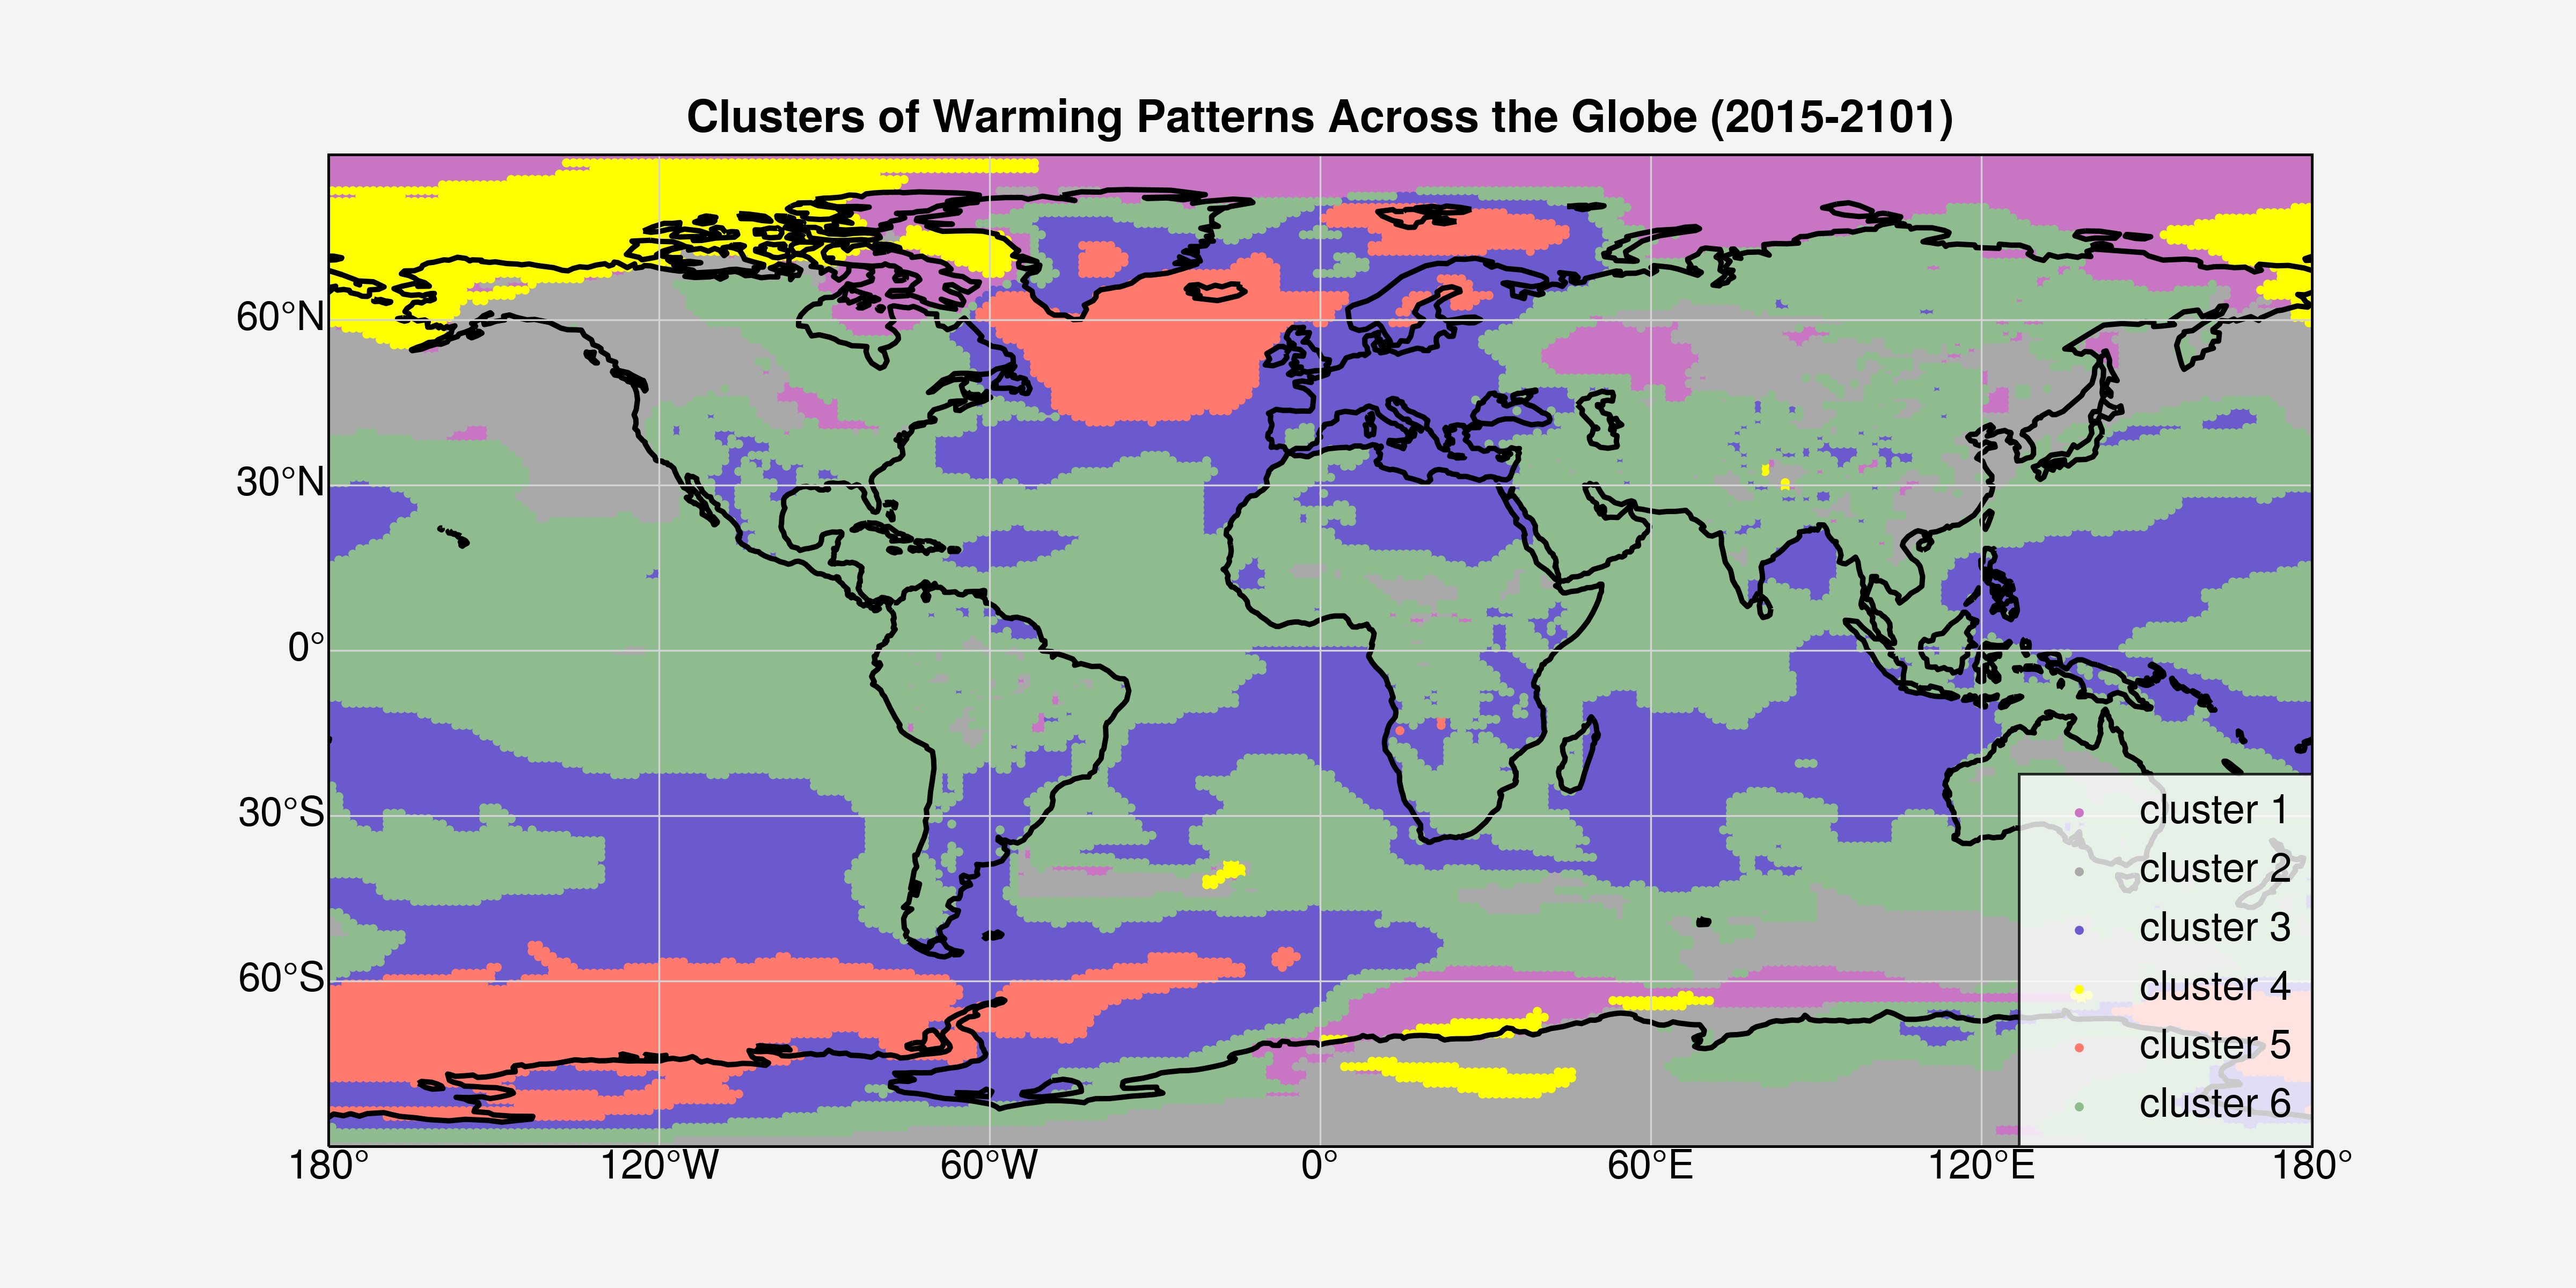

In [64]:
import cartopy.crs as ccrs
import matplotlib.colors as colors
import cartopy.feature as cfeature

fig = plt.figure(figsize=(8,4), dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())

ax.scatter(df1_f['longitude'],df1_f['latitude'],marker='o', s=2, c='orchid', label='cluster 1')
ax.scatter(df2_f['longitude'],df2_f['latitude'],marker='o',s=2,c='darkgrey', label='cluster 2')
ax.scatter(df3_f['longitude'],df3_f['latitude'],marker='o',s=2,c='slateblue', label='cluster 3')
ax.scatter(df4_f['longitude'],df4_f['latitude'],marker='o',s=2,c='yellow', label='cluster 4')
ax.scatter(df5_f['longitude'],df5_f['latitude'],marker='o',s=2,c='salmon', label='cluster 5')
ax.scatter(df6_f['longitude'],df6_f['latitude'],marker='o',s=2,c='darkseagreen', label='cluster 6')
ax.coastlines(linewidth=1.2)
ax.legend(loc='lower right')
plt.title('Clusters of Warming Patterns Across the Globe (2015-2101)', fontsize=10, fontweight='bold')

# Add gridlines with labels
gl = ax.gridlines(color='lightgrey', linestyle='-', draw_labels=True, linewidth=0.4)
gl.top_labels = False
gl.right_labels = False

### 3.5.3. Obtaining the Area of Each Cluster

In [65]:
# obtain the area of each cluster 
import math
L_f = slopes_f.lon[1] - slopes_f.lon[0]
w_f = (slopes_f.lat[1] - slopes_f.lat[0])/2
area_f = [0] * n_clusters_f
for clus_no in range(n_clusters_f):
    df_clus_f = df_f.loc[df_f['labels_6c']==clus_no]
    for k in range(len(df_clus_f)):
        area_f[clus_no] += (L_f/360) * (math.sin(math.radians(df_clus_f.latitude.values[k] + w_f)) 
                                    - math.sin(math.radians(df_clus_f.latitude.values[k] - w_f)))

Text(0.5, 1.0, 'Area of Clusters (2015-2101)')

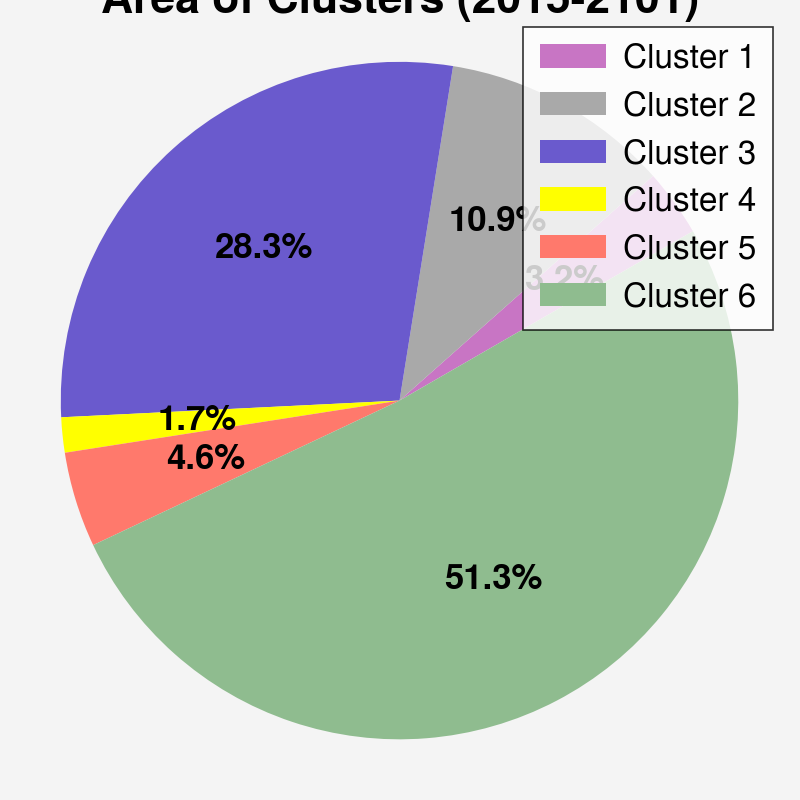

In [66]:
# pie chart showing area of each cluster
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6']
sizes = [area_f[0], area_f[1], area_f[2], area_f[3], area_f[4], area_f[5]]
colors = ['orchid', 'darkgrey', 'slateblue', 'yellow', 'salmon', 'darkseagreen']

plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=30, textprops={'color':'black', 'weight':'bold', 'fontsize':12.5})
plt.legend(labels, loc='upper right', fontsize=12)
plt.axis('equal')
plt.tight_layout()
plt.title('Area of Clusters (2015-2101)', fontsize=16, fontweight='bold')